## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### **TO DO Task 1** 
1. Explore the `pokemon` dataframe, and try to understand the significance of each of its column.
2. There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [3]:
#2
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

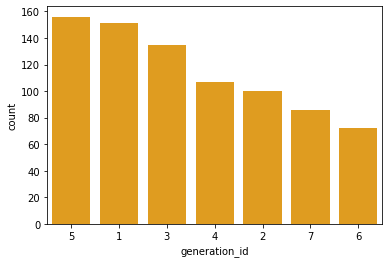

In [46]:
sb.countplot(data =pokemon, x='generation_id' ,order=[5,1,3,4,2,7,6],color='orange')
plt.show()

<AxesSubplot:xlabel='count', ylabel='type_1'>

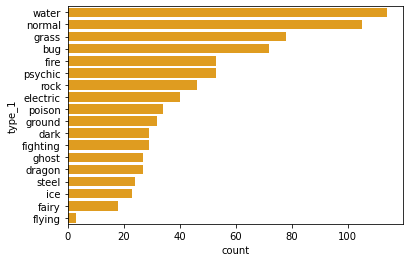

In [47]:
#1
In = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon , y='type_1' ,order=In ,color='orange' )

<AxesSubplot:xlabel='count', ylabel='type_2'>

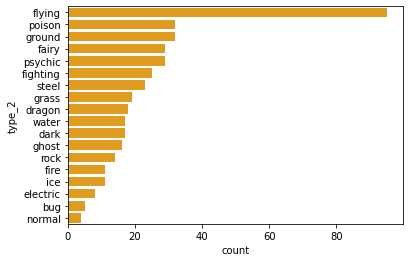

In [48]:
In2 = pokemon['type_2'].value_counts().index
sb.countplot(data=pokemon , y='type_2' ,order=In2 ,color='orange')

In [8]:
pokemon['type_2'].value_counts()

flying      95
poison      32
ground      32
fairy       29
psychic     29
fighting    25
steel       23
grass       19
dragon      18
water       17
dark        17
ghost       16
rock        14
fire        11
ice         11
electric     8
bug          5
normal       4
Name: type_2, dtype: int64

### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**



The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [4]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


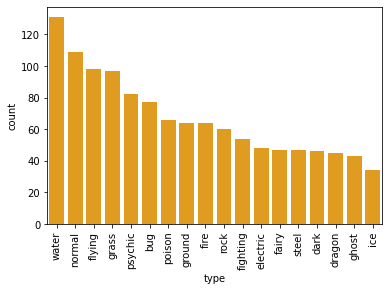

In [11]:
order =pkmn_types.type.value_counts().index
sb.countplot(data=pkmn_types, x='type',order=order,color='orange');
plt.xticks(rotation=90);

2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [55]:
pkmn_types.shape[0]

1212

In [66]:
#sb.histplot(data =pkmn_types , x='type',stat='density');

In [5]:
counts =pkmn_types['type'].value_counts()
i = pkmn_types['type'].value_counts().index

In [47]:
n =pkmn_types.shape[0]
max_prop = counts[0] / n
max_prop

0.10808580858085809

In [46]:
tick_prop =np.arange(0,max_prop,0.02)
tick_prop

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

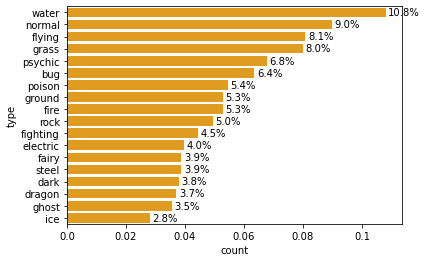

In [54]:
sb.countplot(data =pkmn_types , y='type' ,color='orange' ,order = i);
plt.xticks(tick_prop*n ,tick_prop )
for i in range (counts.shape[0]):
    c=counts[i]
    Str = '{:0.1f}%'.format(100*c/n)
    plt.text(c+1 , i ,Str, va='center')
plt.show()

# Histogram_Practice


In [9]:
# Prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# About the Dataset
We'll continue working with the Pokémon dataset in this workspace. The data was assembled from the database of information found in this GitHub repository.

pokemon = pd.read_csv('pokemon.csv')
pokemon.head()
pokemon = pd.read_csv('pokemon.csv')

In [10]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


# TO DO Task
Pokémon have a number of different statistics that describe their combat capabilities. Here, create a histogram that depicts the distribution of 'special-defense' values taken.

Hint: Try playing around with different bin width sizes to see what best depicts the data.

In [11]:
pokemon['special-defense'].max()

230

In [ ]:
#pokemon['special-defense'].values

In [12]:
bins = np.arange(0 , pokemon['special-defense'].max()+5 ,5)
bins

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230])

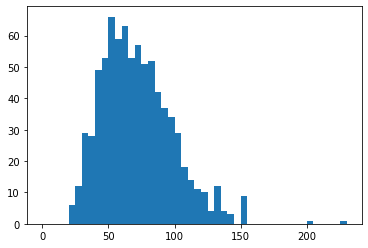

In [13]:
plt.hist(data =pokemon , x= 'special-defense' ,bins=bins);

# 12.1 Scales_and_Transformations_Practice

In [ ]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [14]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


# TO DO Task 1

There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

pokemon['height'].describe()

In [15]:
pokemon['height'].describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

In [16]:
bins = np.arange(0,pokemon['height'].max()+0.1 ,0.1)

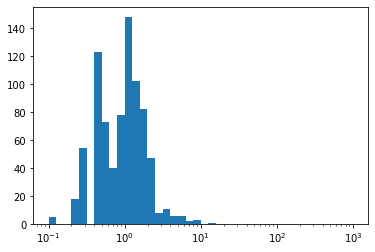

In [17]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data = pokemon, x ='height', bins=bins);
plt.xscale("log");

# TO DO Task 2

In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an axis transformation as part of your visualization workflow.

pokemon['weight'].min()

In [18]:
pokemon['weight'].min()

0.1

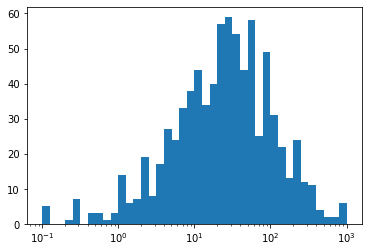

In [19]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data = pokemon, x ='weight', bins=bins);
plt.xscale("log");

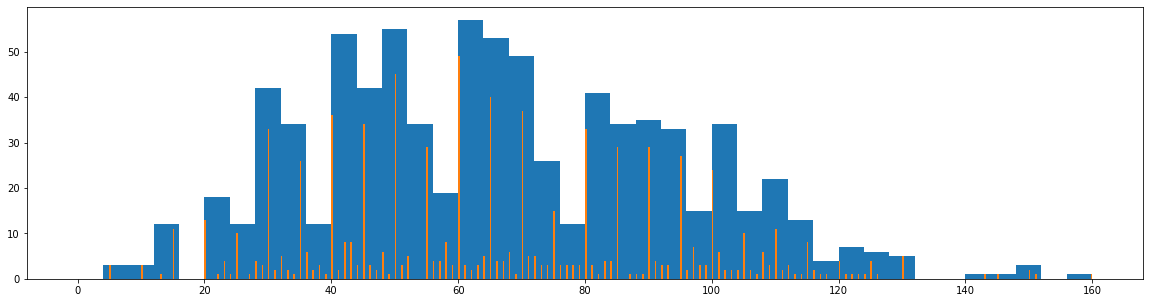

In [6]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 
# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
#plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);
# histogram on right, example of too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);